StatementMeta(, 0b576a68-727c-472e-9bbd-4f863024e2dc, 3, Finished, Available, Finished)

ECONOMIC IMPACT DASHBOARD - REVENUE & MACROECONOMIC ANALYSIS (2019-2024)

Taxi Revenue: USD vs EUR Conversion...
Loaded 2,192 days of revenue data


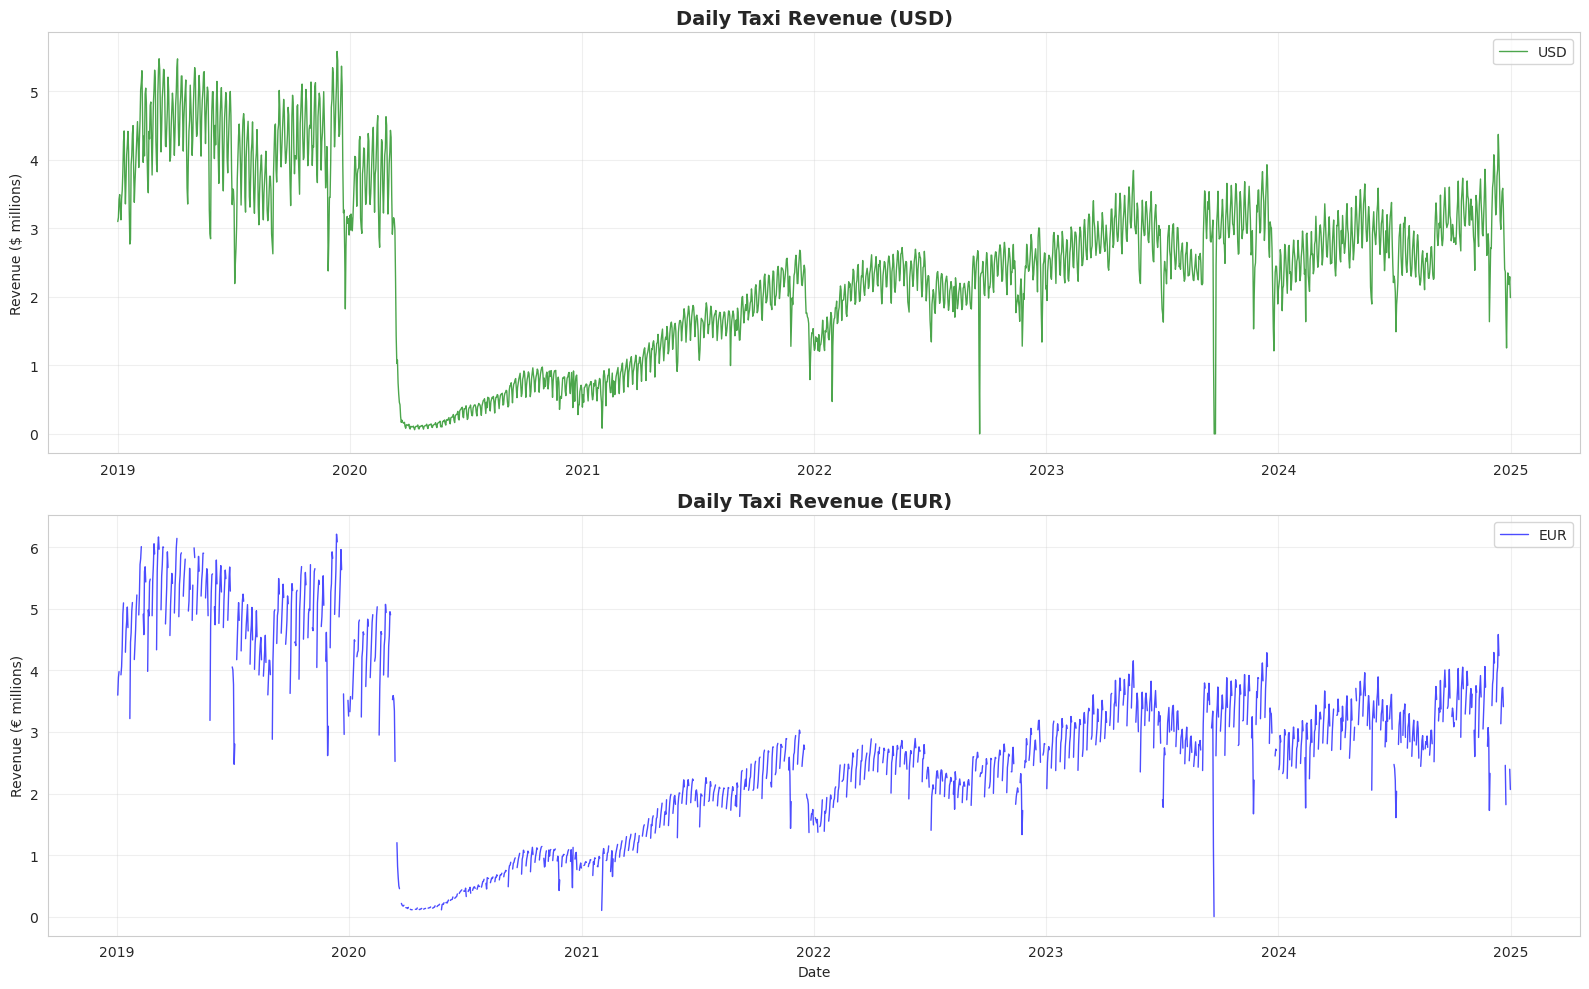


Exchange Rate Impact on Revenue...


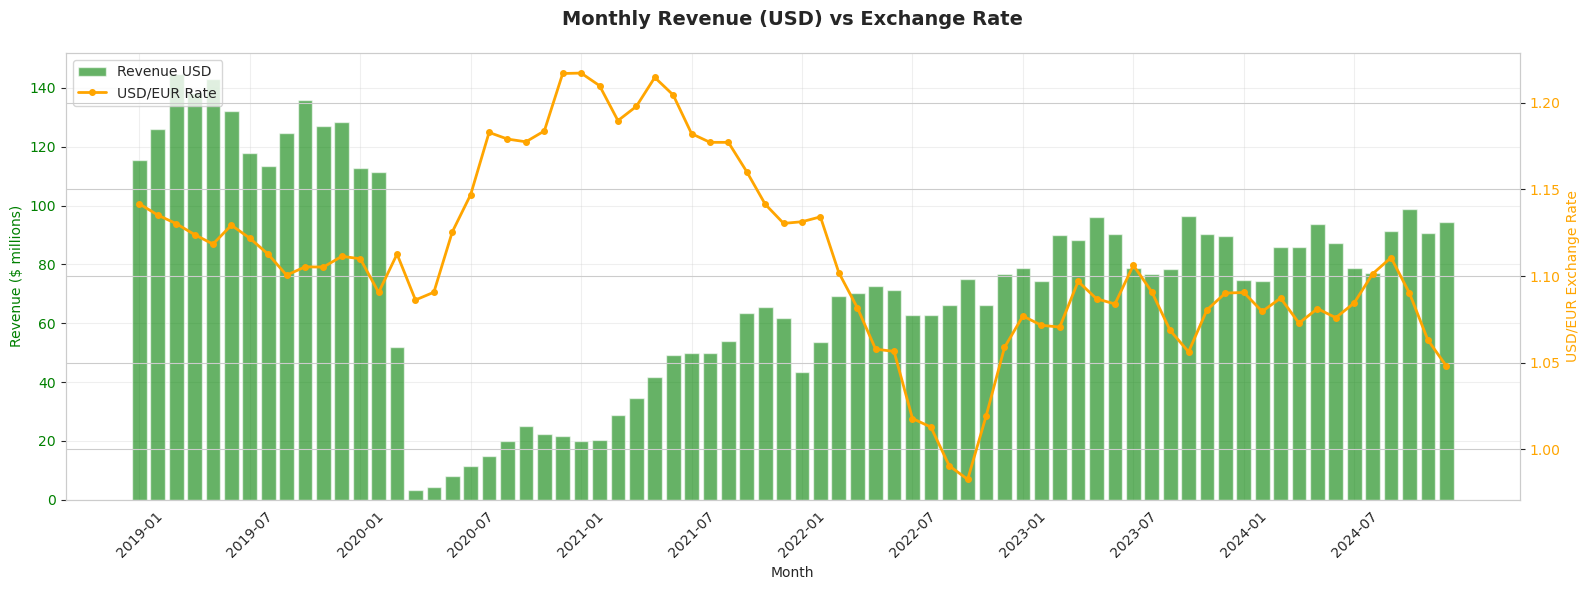


Exchange Rate Impact Summary:
Average FX Rate: 1.1104
FX Rate Range: 0.9826 - 1.2171
Average FX Impact on Revenue: 11.04%

Taxi Revenue in Context of US GDP...


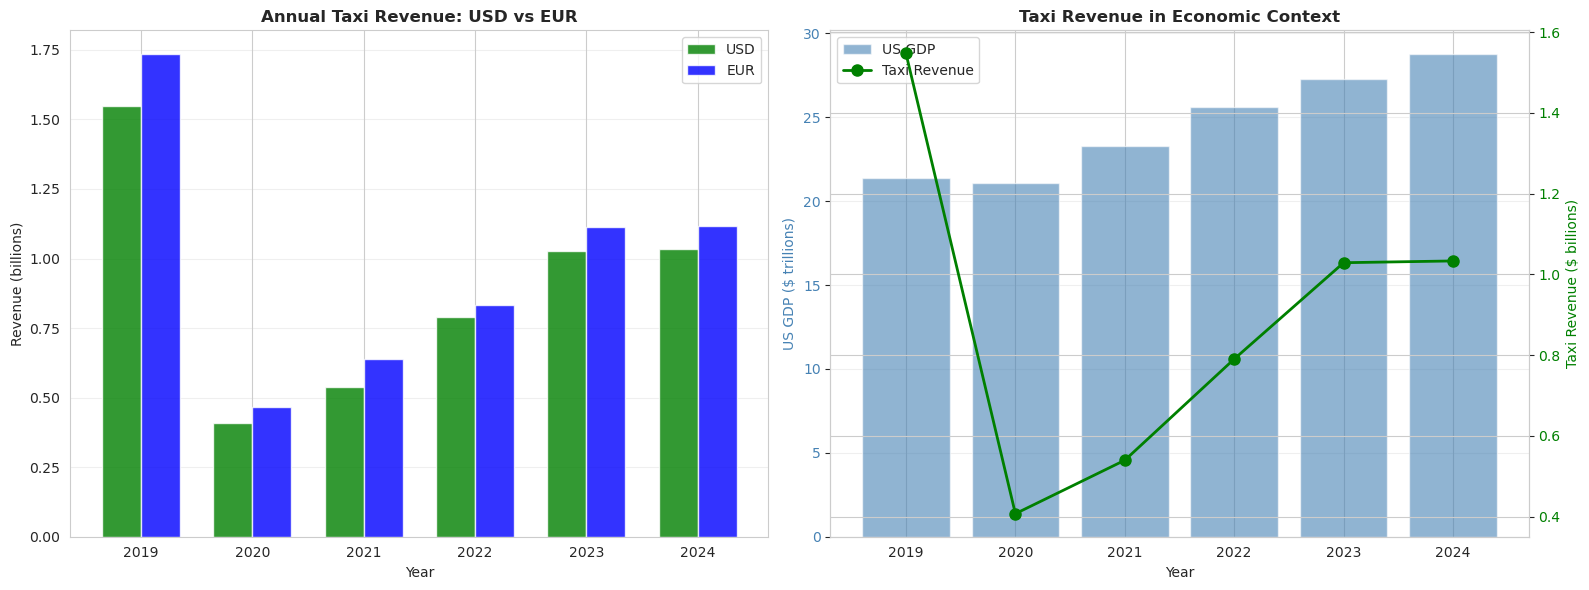


Yearly Revenue & GDP Summary:
 Year  TaxiRevenueUSD  TaxiRevenueEUR       US_GDP  TotalTrips  Revenue_Per_GDP_Million
 2019    1.547280e+09    1.733534e+09 2.138098e+13  81699116.0                72.367133
 2020    4.069928e+08    4.647257e+08 2.106047e+13  22942488.0                19.324961
 2021    5.394747e+08    6.371182e+08 2.331508e+13  28233349.0                23.138445
 2022    7.902252e+08    8.311976e+08 2.560485e+13  36790115.0                30.862328
 2023    1.028707e+09    1.112294e+09 2.729217e+13  35600827.0                37.692399
 2024    1.033092e+09    1.118128e+09 2.875096e+13  35624155.0                35.932436

4. Fare Inflation Analysis...


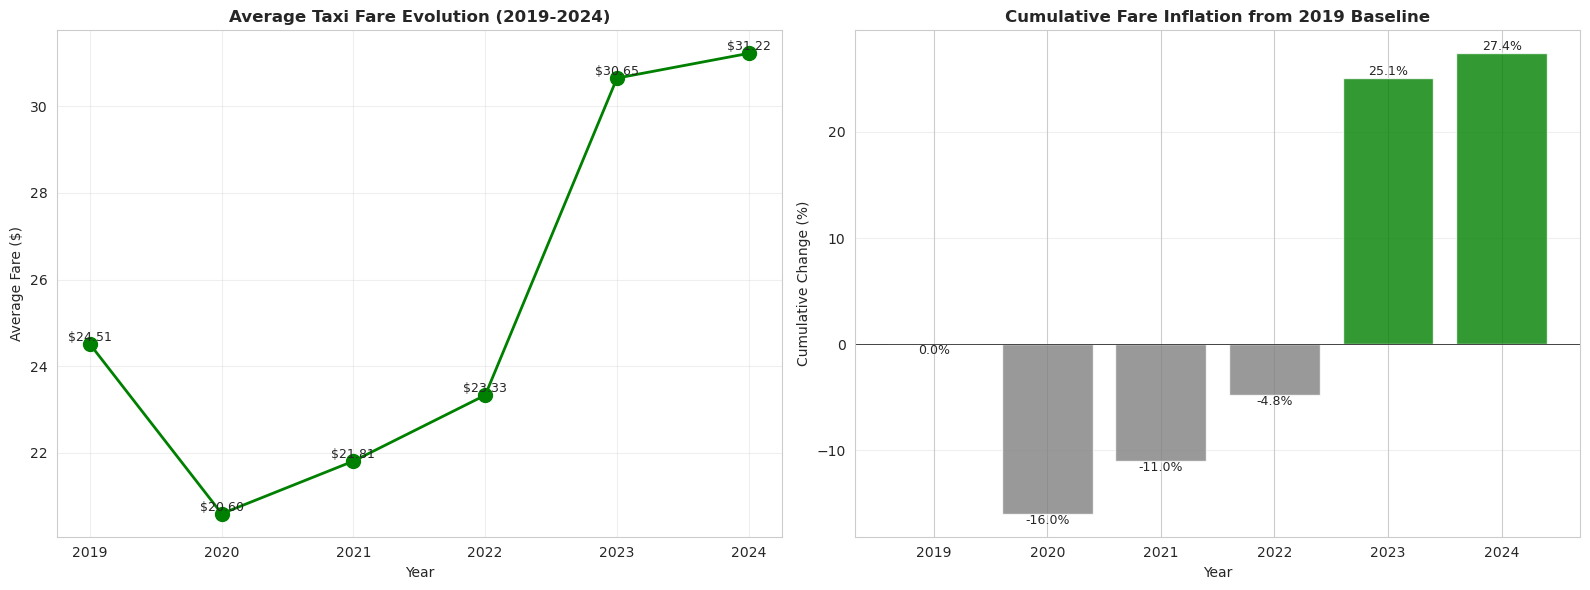


Fare Inflation Summary:
 Year   AvgFare  YoY_Change_Pct  Cumulative_Inflation
 2019 24.509545             NaN              0.000000
 2020 20.597816      -15.960023            -15.960023
 2021 21.812071        5.895067            -11.005810
 2022 23.333384        6.974638             -4.798788
 2023 30.650541       31.359176             25.055528
 2024 31.222189        1.865050             27.387877

Average Revenue Per Trip: Currency Comparison...


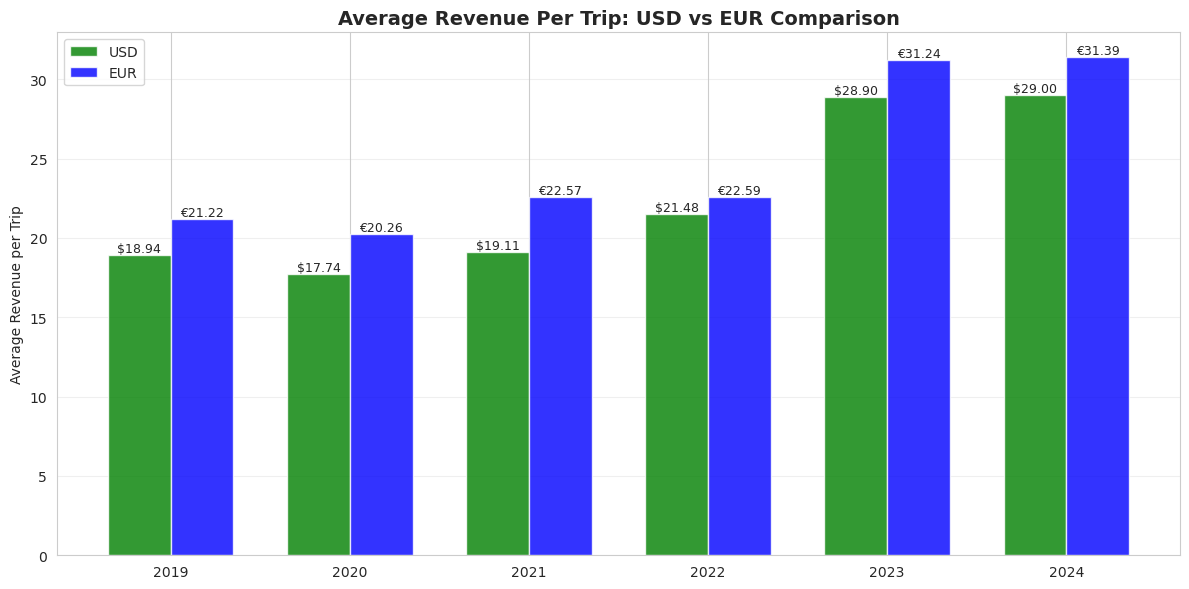


Revenue Per Trip Summary:
 Year  AvgRevenuePerTrip_USD  AvgRevenuePerTrip_EUR
 2019              18.938760              21.218510
 2020              17.739699              20.256115
 2021              19.107712              22.566156
 2022              21.479282              22.592961
 2023              28.895603              31.243491
 2024              28.999758              31.386783
KEY ECONOMIC INSIGHTS (2019-2024)

Total NYC Taxi Revenue:
   USD: $5.35 billion
   EUR: €5.90 billion

Fare Inflation (2019 → 2024):
   2019 Average Fare: $24.51
   2024 Average Fare: $31.22
   Total Increase: +27.4%
   Annual Average: +5.5%

Economic Context:
   US GDP Growth (2019-2024): +34.5%
   Taxi revenue outpaced GDP: No

Exchange Rate Impact:
   FX Volatility (std dev): 0.0533
   Revenue difference (USD vs EUR): 10.3%
ECONOMIC IMPACT DASHBOARD COMPLETE


In [1]:
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

WAREHOUSE = "MobilityWarehouse"

print("ECONOMIC IMPACT DASHBOARD - REVENUE & MACROECONOMIC ANALYSIS (2019-2024)")

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("\nTaxi Revenue: USD vs EUR Conversion...")

df_revenue_fx = spark.sql(f"""
    SELECT 
        d.Date,
        d.Year,
        d.Month,
        SUM(t.TotalAmount) as RevenueUSD,
        AVG(fx.ExchangeRate) as USDEUR_Rate,
        SUM(t.TotalAmount) * AVG(fx.ExchangeRate) as RevenueEUR
    FROM `{WAREHOUSE}`.dbo.DimDate d
    JOIN `{WAREHOUSE}`.dbo.FactTaxiDaily t ON d.DateKey = t.DateKey
    LEFT JOIN `{WAREHOUSE}`.dbo.DimFX fx ON d.Date = fx.Date
    WHERE d.Year BETWEEN 2019 AND 2024
    GROUP BY d.Date, d.Year, d.Month
    ORDER BY d.Date
""")

pdf_revenue = df_revenue_fx.toPandas()
pdf_revenue['Date'] = pd.to_datetime(pdf_revenue['Date'])

for col in ['RevenueUSD', 'USDEUR_Rate', 'RevenueEUR']:
    pdf_revenue[col] = pdf_revenue[col].astype(float)

print(f"Loaded {len(pdf_revenue):,} days of revenue data")

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

axes[0].plot(pdf_revenue['Date'], pdf_revenue['RevenueUSD']/1e6, 
             linewidth=1, alpha=0.7, color='green', label='USD')
axes[0].set_title('Daily Taxi Revenue (USD)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Revenue ($ millions)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(pdf_revenue['Date'], pdf_revenue['RevenueEUR']/1e6, 
             linewidth=1, alpha=0.7, color='blue', label='EUR')
axes[1].set_title('Daily Taxi Revenue (EUR)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Revenue (€ millions)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nExchange Rate Impact on Revenue...")

df_monthly_fx = spark.sql(f"""
    SELECT 
        d.Year,
        d.Month,
        d.MonthName,
        SUM(t.TotalAmount) as RevenueUSD,
        AVG(fx.ExchangeRate) as AvgUSDEUR_Rate,
        SUM(t.TotalAmount) * AVG(fx.ExchangeRate) as RevenueEUR
    FROM `{WAREHOUSE}`.dbo.DimDate d
    JOIN `{WAREHOUSE}`.dbo.FactTaxiDaily t ON d.DateKey = t.DateKey
    LEFT JOIN `{WAREHOUSE}`.dbo.DimFX fx ON d.Date = fx.Date
    WHERE d.Year BETWEEN 2019 AND 2024
    GROUP BY d.Year, d.Month, d.MonthName
    ORDER BY d.Year, d.Month
""")

pdf_monthly_fx = df_monthly_fx.toPandas()
for col in ['RevenueUSD', 'AvgUSDEUR_Rate', 'RevenueEUR']:
    pdf_monthly_fx[col] = pdf_monthly_fx[col].astype(float)

pdf_monthly_fx['FX_Impact_Pct'] = ((pdf_monthly_fx['RevenueEUR'] / pdf_monthly_fx['RevenueUSD']) - 1) * 100

fig, ax1 = plt.subplots(figsize=(16, 6))

color = 'green'
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue ($ millions)', color=color)
ax1.bar(range(len(pdf_monthly_fx)), pdf_monthly_fx['RevenueUSD']/1e6, 
        alpha=0.6, color=color, label='Revenue USD')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(0, len(pdf_monthly_fx), 6))
ax1.set_xticklabels([f"{row['Year']}-{row['Month']:02d}" 
                      for _, row in pdf_monthly_fx.iloc[::6].iterrows()], rotation=45)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
color = 'orange'
ax2.set_ylabel('USD/EUR Exchange Rate', color=color)
ax2.plot(range(len(pdf_monthly_fx)), pdf_monthly_fx['AvgUSDEUR_Rate'], 
         color=color, marker='o', linewidth=2, markersize=4, label='USD/EUR Rate')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Monthly Revenue (USD) vs Exchange Rate', fontsize=14, fontweight='bold', pad=20)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

print("\nExchange Rate Impact Summary:")
print(f"Average FX Rate: {pdf_monthly_fx['AvgUSDEUR_Rate'].mean():.4f}")
print(f"FX Rate Range: {pdf_monthly_fx['AvgUSDEUR_Rate'].min():.4f} - {pdf_monthly_fx['AvgUSDEUR_Rate'].max():.4f}")
print(f"Average FX Impact on Revenue: {pdf_monthly_fx['FX_Impact_Pct'].mean():.2f}%")

print("\nTaxi Revenue in Context of US GDP...")

df_revenue_gdp = spark.sql(f"""
    SELECT 
        d.Year,
        SUM(t.TotalAmount) as TaxiRevenueUSD,
        SUM(t.TotalAmount) * AVG(fx.ExchangeRate) as TaxiRevenueEUR,
        MAX(gdp.GDP) as US_GDP,
        SUM(t.TripCount) as TotalTrips
    FROM `{WAREHOUSE}`.dbo.DimDate d
    JOIN `{WAREHOUSE}`.dbo.FactTaxiDaily t ON d.DateKey = t.DateKey
    LEFT JOIN `{WAREHOUSE}`.dbo.DimFX fx ON d.Date = fx.Date
    LEFT JOIN `{WAREHOUSE}`.dbo.DimGDP gdp ON d.Year = gdp.Year
    WHERE d.Year BETWEEN 2019 AND 2024
    GROUP BY d.Year
    ORDER BY d.Year
""")

pdf_revenue_gdp = df_revenue_gdp.toPandas()
for col in ['TaxiRevenueUSD', 'TaxiRevenueEUR', 'US_GDP', 'TotalTrips']:
    pdf_revenue_gdp[col] = pdf_revenue_gdp[col].astype(float)

pdf_revenue_gdp['Revenue_Per_GDP_Million'] = (pdf_revenue_gdp['TaxiRevenueUSD'] / pdf_revenue_gdp['US_GDP']) * 1e6

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

x = pdf_revenue_gdp['Year']
width = 0.35
x_pos = np.arange(len(x))

axes[0].bar(x_pos - width/2, pdf_revenue_gdp['TaxiRevenueUSD']/1e9, 
            width, label='USD', color='green', alpha=0.8)
axes[0].bar(x_pos + width/2, pdf_revenue_gdp['TaxiRevenueEUR']/1e9, 
            width, label='EUR', color='blue', alpha=0.8)
axes[0].set_title('Annual Taxi Revenue: USD vs EUR', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Revenue (billions)')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(x)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

ax1 = axes[1]
color = 'steelblue'
ax1.set_xlabel('Year')
ax1.set_ylabel('US GDP ($ trillions)', color=color)
ax1.bar(x, pdf_revenue_gdp['US_GDP']/1e12, alpha=0.6, color=color, label='US GDP')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Taxi Revenue in Economic Context', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

ax2 = ax1.twinx()
color = 'green'
ax2.set_ylabel('Taxi Revenue ($ billions)', color=color)
ax2.plot(x, pdf_revenue_gdp['TaxiRevenueUSD']/1e9, 
         color=color, marker='o', linewidth=2, markersize=8, label='Taxi Revenue')
ax2.tick_params(axis='y', labelcolor=color)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

print("\nYearly Revenue & GDP Summary:")
print(pdf_revenue_gdp.to_string(index=False))

print("\n4. Fare Inflation Analysis...")

df_fare_trends = spark.sql(f"""
    SELECT 
        d.Year,
        AVG(t.AvgFareAmount) as AvgFare,
        SUM(t.TripCount) as TotalTrips,
        SUM(t.TotalAmount) / SUM(t.TripCount) as AvgRevenuePerTrip
    FROM `{WAREHOUSE}`.dbo.DimDate d
    JOIN `{WAREHOUSE}`.dbo.FactTaxiDaily t ON d.DateKey = t.DateKey
    WHERE d.Year BETWEEN 2019 AND 2024
    GROUP BY d.Year
    ORDER BY d.Year
""")

pdf_fares = df_fare_trends.toPandas()
for col in ['AvgFare', 'TotalTrips', 'AvgRevenuePerTrip']:
    pdf_fares[col] = pdf_fares[col].astype(float)

pdf_fares['YoY_Change_Pct'] = pdf_fares['AvgFare'].pct_change() * 100
pdf_fares['Cumulative_Inflation'] = ((pdf_fares['AvgFare'] / pdf_fares['AvgFare'].iloc[0]) - 1) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(pdf_fares['Year'], pdf_fares['AvgFare'], 
             marker='o', linewidth=2, markersize=10, color='green')
axes[0].set_title('Average Taxi Fare Evolution (2019-2024)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Fare ($)')
axes[0].grid(True, alpha=0.3)
for _, row in pdf_fares.iterrows():
    axes[0].text(row['Year'], row['AvgFare'], f"${row['AvgFare']:.2f}", 
                ha='center', va='bottom', fontsize=9)

axes[1].bar(pdf_fares['Year'], pdf_fares['Cumulative_Inflation'], 
            color=['gray' if x < 0 else 'green' for x in pdf_fares['Cumulative_Inflation']], alpha=0.8)
axes[1].set_title('Cumulative Fare Inflation from 2019 Baseline', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Cumulative Change (%)')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].grid(True, alpha=0.3, axis='y')
for _, row in pdf_fares.iterrows():
    axes[1].text(row['Year'], row['Cumulative_Inflation'], 
                f"{row['Cumulative_Inflation']:.1f}%", 
                ha='center', va='bottom' if row['Cumulative_Inflation'] > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

print("\nFare Inflation Summary:")
print(pdf_fares[['Year', 'AvgFare', 'YoY_Change_Pct', 'Cumulative_Inflation']].to_string(index=False))

print("\nAverage Revenue Per Trip: Currency Comparison...")

df_trip_revenue = spark.sql(f"""
    SELECT 
        d.Year,
        SUM(t.TotalAmount) / SUM(t.TripCount) as AvgRevenuePerTrip_USD,
        (SUM(t.TotalAmount) * AVG(fx.ExchangeRate)) / SUM(t.TripCount) as AvgRevenuePerTrip_EUR
    FROM `{WAREHOUSE}`.dbo.DimDate d
    JOIN `{WAREHOUSE}`.dbo.FactTaxiDaily t ON d.DateKey = t.DateKey
    LEFT JOIN `{WAREHOUSE}`.dbo.DimFX fx ON d.Date = fx.Date
    WHERE d.Year BETWEEN 2019 AND 2024
    GROUP BY d.Year
    ORDER BY d.Year
""")

pdf_trip_revenue = df_trip_revenue.toPandas()
for col in ['AvgRevenuePerTrip_USD', 'AvgRevenuePerTrip_EUR']:
    pdf_trip_revenue[col] = pdf_trip_revenue[col].astype(float)

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(pdf_trip_revenue))
width = 0.35

ax.bar(x - width/2, pdf_trip_revenue['AvgRevenuePerTrip_USD'], 
       width, label='USD', color='green', alpha=0.8)
ax.bar(x + width/2, pdf_trip_revenue['AvgRevenuePerTrip_EUR'], 
       width, label='EUR', color='blue', alpha=0.8)

ax.set_ylabel('Average Revenue per Trip')
ax.set_title('Average Revenue Per Trip: USD vs EUR Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(pdf_trip_revenue['Year'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

for i, row in pdf_trip_revenue.iterrows():
    ax.text(i - width/2, row['AvgRevenuePerTrip_USD'], 
           f"${row['AvgRevenuePerTrip_USD']:.2f}", 
           ha='center', va='bottom', fontsize=9)
    ax.text(i + width/2, row['AvgRevenuePerTrip_EUR'], 
           f"€{row['AvgRevenuePerTrip_EUR']:.2f}", 
           ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nRevenue Per Trip Summary:")
print(pdf_trip_revenue.to_string(index=False))

print("KEY ECONOMIC INSIGHTS (2019-2024)")

total_usd = pdf_revenue_gdp['TaxiRevenueUSD'].sum()
total_eur = pdf_revenue_gdp['TaxiRevenueEUR'].sum()

print(f"\nTotal NYC Taxi Revenue:")
print(f"   USD: ${total_usd/1e9:.2f} billion")
print(f"   EUR: €{total_eur/1e9:.2f} billion")

fare_2019 = pdf_fares[pdf_fares['Year'] == 2019]['AvgFare'].iloc[0]
fare_2024 = pdf_fares[pdf_fares['Year'] == 2024]['AvgFare'].iloc[0]
fare_inflation = ((fare_2024 / fare_2019) - 1) * 100

print(f"\nFare Inflation (2019 → 2024):")
print(f"   2019 Average Fare: ${fare_2019:.2f}")
print(f"   2024 Average Fare: ${fare_2024:.2f}")
print(f"   Total Increase: +{fare_inflation:.1f}%")
print(f"   Annual Average: +{fare_inflation/5:.1f}%")

gdp_2019 = pdf_revenue_gdp[pdf_revenue_gdp['Year'] == 2019]['US_GDP'].iloc[0]
gdp_2024 = pdf_revenue_gdp[pdf_revenue_gdp['Year'] == 2024]['US_GDP'].iloc[0]
gdp_growth = ((gdp_2024 / gdp_2019) - 1) * 100

print(f"\nEconomic Context:")
print(f"   US GDP Growth (2019-2024): +{gdp_growth:.1f}%")
print(f"   Taxi revenue outpaced GDP: {'Yes' if fare_inflation > gdp_growth else 'No'}")

fx_variance = pdf_monthly_fx['AvgUSDEUR_Rate'].std()
print(f"\nExchange Rate Impact:")
print(f"   FX Volatility (std dev): {fx_variance:.4f}")
print(f"   Revenue difference (USD vs EUR): {((total_eur - total_usd)/total_usd * 100):.1f}%")

print("ECONOMIC IMPACT DASHBOARD COMPLETE")